<div dir="rtl"> סעיף
1. נא לפלוט גרף שמראה את כל מספר התאונות כפונקצייה של הskill של העובד.

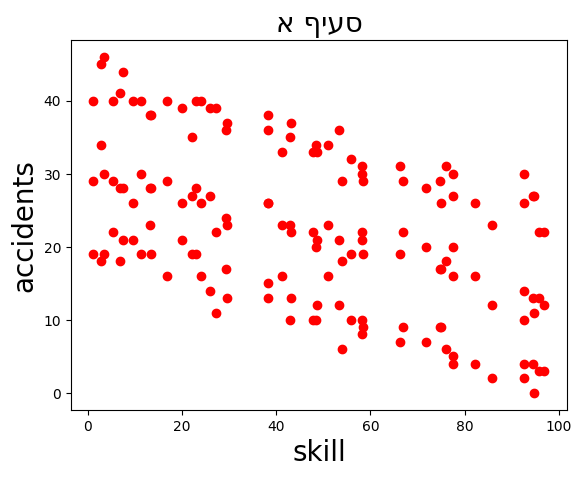

In [ ]:
plt.figure()
plt.scatter(df_data.skill , df_data.accidents , color = 'r')
plt.xlabel('skill', fontsize = 20)
plt.ylabel('accidents', fontsize = 20)
plt.title('א ףיעס', fontsize = 20)
plt.show()

<div dir="rtl"> סעיף
2. נא להוציא משוואה ליניארית המתארת את הקשר בין הskill למספר התאונות. יש לרשום את המשוואה.
    בנוסף להוציא גרף של הנתונים יחד עם משוואת הרגרסיה. לאחר מכן יש להוציא גרף של הנתונים יחד עם המשוואה שהתקבלה.

In [ ]:
# Create a linear regression model
model = sm.OLS(df_data.accidents , df_data[['intercept', 'skill']])
# Fit the model
results = model.fit()
# Print summary statistics, including p-values for each coefficient
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              accidents   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     55.62
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           6.86e-12
Time:                        17:43:56   Log-Likelihood:                -545.56
No. Observations:                 150   AIC:                             1095.
Df Residuals:                     148   BIC:                             1101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     31.5443      1.423     22.161      0.0

<div dir="rtl">

    
###  משוואת חיזוי רגרסיה ליניארית:
    
###  $$ \hat{Y} = 79.2165 - 1.4277 X $$


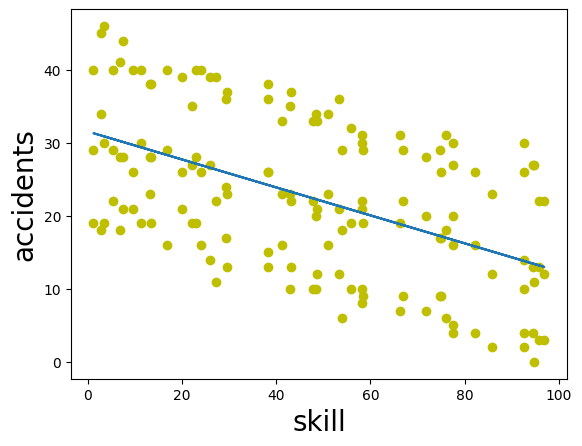

In [ ]:
plt.figure()
plt.scatter(df_data.skill , df_data.accidents , color = 'y')
plt.xlabel('skill', fontsize = 20)
plt.ylabel('accidents', fontsize = 20)
xskill = sm.add_constant(df_data.skill)
plt.plot(df_data.skill, results.predict(xskill))
plt.show()
print(' ')


    
###  Y = 79.2165 - 1.4277 X
###  Y  - accidents
###  X - skill

<div dir="rtl"> סעיף
3. מהו ה$R^2$? מהו pvalue של הskill ו החותך? האם שניהם נכנסים למודל?

## $$R^2 = 0.273 $$

In [ ]:
model = sm.OLS(df_data.accidents , df_data[['intercept', 'skill']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              accidents   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     55.62
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           6.86e-12
Time:                        17:43:57   Log-Likelihood:                -545.56
No. Observations:                 150   AIC:                             1095.
Df Residuals:                     148   BIC:                             1101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     31.5443      1.423     22.161      0.0

הפי ווליו של המיומנות והחותך נמוכים מאוד ונותנים לנו מוהקות סטטיסטית ולכן אין להוציא אותם מהמודל.

<div dir="rtl"> סעיף
4. להוציא גרף כמו מקודם שמתאר את מספר התאונות כפונקצייה של הskill, רק הפעם שכל מכונה תהיה צבועה בצבע אחר.

<Axes: xlabel='skill', ylabel='accidents'>

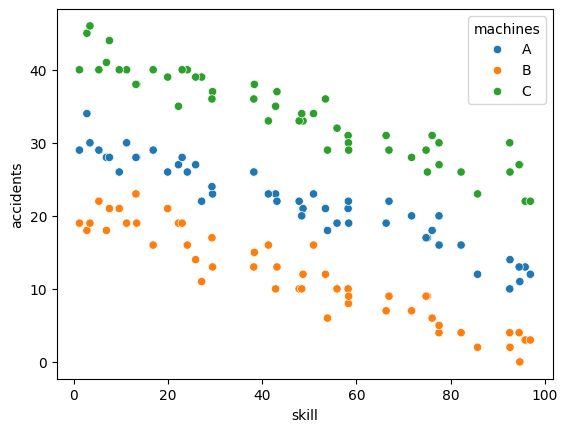

In [ ]:
import seaborn as sns
sns.scatterplot(data=df_data, x='skill', y='accidents',hue= 'machines')

<div dir="rtl"> סעיף
5.  להוציא משוואת רגרסיה כאשר סוג המכונה גם נכנס למודל. האם יש שינוי ב$R^2$, מה ההבדל בין המכונות השונות? באיזו מכונה יש הכי הרבה תאונות? האם זה בהלימה עם הגרף מהסעיף הקודם?

In [ ]:
dummy_variables = pd.get_dummies(df_data['machines'])
Ndata = pd.concat([df_data, dummy_variables], axis=1)
Ndata.head()

,intercept,employ_id,skill,machines,accidents,A,B,C
0,1.0,1,95.828940,A,13,1,0,0
1,1.0,2,75.077053,A,17,1,0,0
2,1.0,3,24.102591,A,26,1,0,0
3,1.0,4,11.216351,A,30,1,0,0
4,1.0,5,77.530490,A,20,1,0,0


In [ ]:
model1 = sm.OLS(Ndata['accidents'], Ndata.loc[:, ['intercept', 'skill', 'B', 'C']])
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:              accidents   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     1395.
Date:                Sun, 04 Feb 2024   Prob (F-statistic):          3.22e-107
Time:                        19:05:29   Log-Likelihood:                -315.25
No. Observations:                 150   AIC:                             638.5
Df Residuals:                     146   BIC:                             650.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     30.9576      0.386     80.218      0.0

$$ \hat{Y} = 30.96 - 0.1913*X_1 - 10.1*X_2 + 11.86 * X_3  $$

$$ \hat{Y} = accidents $$

$$ X_1 = skill $$

$$ X_2 = machine B $$

$$ X_3 = machine C $$


<div dir="rtl">
 השינוי ב$R^2$ שיפר את המודל מאוד מכיוון שהחלוקה הקטינה את השונות הגדולה שהייתה וחילקה את המודל בצורה יותר מושלמת.

 ההבדל בין המכונות השונות הוא כמות התאונות שמתרחשות בה על אף שניקח מיומנות זהה.

במכונה C יש הכי הרבה תאונות.

 בהלימה מלאה, ניתן לראות בגרך בסעיף הקודם כי במכונה לC שצבועה בצבע ירוק יש הכי הרבה תאונות לכן נוסיף למודל ב+ לעומת מכונה B הצבועה בצבע כתום לה יש פחות תאונות ולכן במשוואה נחסיר על מנת לדייק בתוצאה.

<div dir="rtl"> סעיף
6. מה המשמעות של הפרטמרים של משתני הדמה במודל?

<div dir="rtl">

הפרמטרים של משתני הדמה בעצם יראו לנו מהי הסטייה בממוצע מהמשתנה שקבענו כבסיס המודל במקרה הזה מכונה A.

<div dir="rtl"> סעיף
7. נא לבדוק את הנחות המודל

In [ ]:
plt. figure()
df_data['preds_with_dummy_residuals'] = results1.predict(Ndata.loc[:, ['intercept', 'skill', 'B', 'C']])
plt.scatter(df_data['skill'], df_data['preds_with_dummy_residuals'], label = 'predictions')

plt.xlabel('Skill', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)
plt.plot(np.arange(100), np.zeros(100))
plt.legend()
plt.title('Accidents - skill graph', fontsize= 20)
plt.show()

<IPython.core.display.Javascript object>

<div dir="rtl">
    
# תרגיל 3

<div dir="rtl"> סעיף 1. לבצע מודל רגרסיה עם כל המשתנים. אילו פרמטרים נכנסנו ואילו לא.  

In [ ]:
# Create a linear regression model
model = sm.OLS(data_3.selling_price , data_3[['Intercept',	'num_bedroom', 'num_bathrooms',	'Distance_from_City_Center',	'Distance_from_entrance']])
# Fit the model
results = model.fit()
# Print summary statistics, including p-values for each coefficient
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1549.
Date:                Sun, 04 Feb 2024   Prob (F-statistic):          1.63e-146
Time:                        17:43:58   Log-Likelihood:                -1659.4
No. Observations:                 200   AIC:                             3329.
Df Residuals:                     195   BIC:                             3345.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

## <div dir="rtl"> - ניתן לראות שאין מובהקות סטטיסטית עבור ״המרחק מכניסת העיר״ לכן יש לוותר על פרמטר זה.

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
sns.regplot(x='num_bedroom', y='selling_price', data=data_3, ax=ax[0])
ax[0].set_title("num_bedroom")
sns.regplot(x='num_bathrooms', y='selling_price', data=data_3, ax=ax[1])
ax[1].set_title("num_bathrooms")
sns.regplot(x='Distance_from_City_Center', y='selling_price', data=data_3, ax=ax[2])
ax[2].set_title("Distance_from_City_Center")

plt.show()

<IPython.core.display.Javascript object>

<div dir="rtl">
 - ניתן לראות שפיזור השונות אחיד

<div dir="rtl"> סעיף 2. אם יש פרמטרים שלא נכנסנו, יש להוציא אותם ולהכניס רק פרמטרים שכן במודל. .  

In [ ]:
model = sm.OLS(data_3.selling_price , data_3[['Intercept',	'num_bedroom', 'num_bathrooms', 'Distance_from_City_Center']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     2070.
Date:                Sun, 04 Feb 2024   Prob (F-statistic):          4.34e-148
Time:                        17:43:58   Log-Likelihood:                -1659.7
No. Observations:                 200   AIC:                             3327.
Df Residuals:                     196   BIC:                             3341.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<div dir="rtl"> סעיף 3. מהו ה$R^2$ של המודל הסופי? הוא הוא מצביע על קשר ליניארי אדוק בין המשתנים המסבירים והמוסברים.

## $$ R-squared:                       0.969 $$

<div dir="rtl">   ה$R^2$ של המודל הסופי מצביע על קשר ליניארי טוב בין המשתנים המסבירים והמוסברים, וככל שמוסיפים פרמטרים ניתן לחזות בצורה יותר מדוייקת.